In [92]:
%matplotlib inline
import numpy as np, numpy.random
import matplotlib.pyplot as plt
import cvxopt as opt
from cvxopt import blas, solvers

np.random.seed(1) # fixed random seed

n_portfolio = 100 # number of portfolios
n_asset = 3 # number of assets

# generate random matrix
rand_matrix = np.random.random((n_portfolio, n_asset))
# print rand_matrix

In [93]:
# create portfolios
portfolio = np.zeros((n_portfolio, n_asset))
i = 0
for row in rand_matrix: # each portfolio sum up to 1
    row_sum = np.sum(row)
    j = 0
    for col in row:
        portfolio[i][j] = col/row_sum
        j += 1
    i += 1
# print portfolio

In [94]:
assets = [0.1, 0.2, 0.15] # 3 assets with different mean return
# find expected return of each portfolio
E = np.dot(portfolio, assets)
# print E

In [95]:
# covariance of all assets
C = np.array([[0.005, -0.01, 0.004], [-0.01, 0.04, -0.002], [0.004, -0.002, 0.023]])
# print C

In [96]:
# find variance of all portfolio
variance = np.zeros((n_portfolio, 1))
i = 0
for row in portfolio:
    variance[i] = np.dot(np.dot(row, C), row.T)
    i += 1
# print variance

     pcost       dcost       gap    pres   dres
 0: -1.5250e-01 -7.6333e+00  7e+00  6e-17  2e-16
 1: -1.5542e-01 -3.8714e-01  2e-01  2e-16  2e-16
 2: -2.3090e-01 -2.6667e-01  4e-02  1e-16  4e-17
 3: -2.4978e-01 -2.5037e-01  6e-04  0e+00  3e-17
 4: -2.5000e-01 -2.5000e-01  6e-06  1e-16  4e-17
 5: -2.5000e-01 -2.5000e-01  6e-08  2e-16  2e-17
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.4911e-01 -7.6170e+00  7e+00  1e-16  4e-16
 1: -1.5137e-01 -3.6109e-01  2e-01  2e-16  8e-16
 2: -1.9151e-01 -2.2429e-01  3e-02  1e-16  3e-17
 3: -2.0988e-01 -2.1263e-01  3e-03  1e-16  6e-17
 4: -2.1197e-01 -2.1201e-01  4e-05  2e-16  2e-17
 5: -2.1200e-01 -2.1200e-01  4e-07  5e-16  5e-17
 6: -2.1200e-01 -2.1200e-01  4e-09  4e-16  4e-17
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.4579e-01 -7.6013e+00  7e+00  6e-17  4e-16
 1: -1.4750e-01 -3.3576e-01  2e-01  3e-16  4e-16
 2: -1.6858e-01 -1.9253e-01  2e-02  3e-16  2e-17
 3: -1.7482e-01 -1.7817e

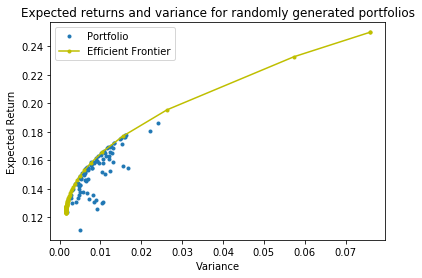

In [97]:
fig, ax = plt.subplots()
plotfolios = ax.plot(variance, E, 'o', markersize=3, label='Portfolio')
plt.xlabel('Variance')
plt.ylabel('Expected Return')
plt.title('Expected returns and variance for randomly generated portfolios')
# plt.legend(loc='upper left')
# plt.show()

N = 100
points = [t for t in range(N)] # find max return for 100 points
S = opt.matrix(C)
q = opt.matrix(assets, (3, 1)) # mean return of 3 assets

G = -opt.matrix(np.eye(n_asset)) # all 3 portions >= 0, shortsale constraint
oo = opt.matrix([-G, G], (6, 3))
# G = opt.matrix(0.0, (n_asset, n_asset)) # no inequality constraint
# h = opt.matrix(0.0, (n_asset, 1))
h = opt.matrix(1.0, (6, 1))
A = opt.matrix(1.0, (1, n_asset)) # all 3 portions sum to 1
b = opt.matrix(1.0)

# portfolios = [solvers.lp(-q*x, G, h, A, b)['x'] for x in points]
portfolios = [solvers.qp(x*S, -q, oo, h, A, b)['x'] for x in points]
returns = [blas.dot(q, x) for x in portfolios]
risks = [blas.dot(x, S*x) for x in portfolios]

frontier = ax.plot(risks, returns, 'y-o', markersize=3, label='Efficient Frontier')
ax.legend(loc='best')
# plt.show()
# fig

In [98]:
# create portfolios with asset 1 allocated 0
rand_matrix1 = np.copy(rand_matrix)
rand_matrix1[:, 0] = 0
# print rand_matrix1

In [99]:
portfolio1 = np.zeros((n_portfolio, n_asset))
i = 0
for row in rand_matrix1: # each portfolio sum up to 1
    row_sum = np.sum(row)
    j = 0
    for col in row:
        portfolio1[i][j] = col/row_sum
        j += 1
    i += 1
# print portfolio1
E1 = np.dot(portfolio1, assets)
# print E

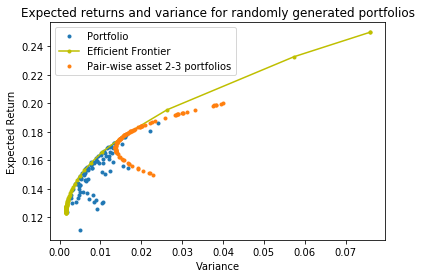

In [100]:
variance1 = np.zeros((n_portfolio, 1))
i = 0
for row in portfolio1:
    variance1[i] = np.dot(np.dot(row, C), row.T)
    i += 1

ax.plot(variance1, E1, 'o', markersize=3, label="Pair-wise asset 2-3 portfolios")
ax.legend()
# ax.legend_.remove()
fig
# plt.show()

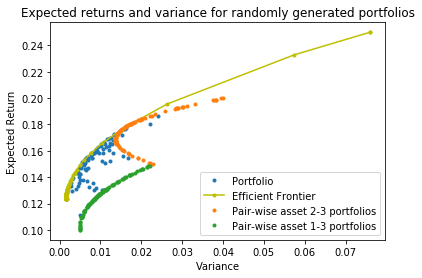

In [101]:
# create portfolios with asset 2 allocated 0
rand_matrix2 = np.copy(rand_matrix)
rand_matrix2[:, 1] = 0
# print rand_matrix2

portfolio2 = np.zeros((n_portfolio, n_asset))
i = 0
for row in rand_matrix2: # each portfolio sum up to 1
    row_sum = np.sum(row)
    j = 0
    for col in row:
        portfolio2[i][j] = col/row_sum
        j += 1
    i += 1
# print portfolio2
E2 = np.dot(portfolio2, assets)

variance2 = np.zeros((n_portfolio, 1))
i = 0
for row in portfolio2:
    variance2[i] = np.dot(np.dot(row, C), row.T)
    i += 1

ax.plot(variance2, E2, 'o', markersize=3, label="Pair-wise asset 1-3 portfolios")
ax.legend()
# ax.legend_.remove()
fig

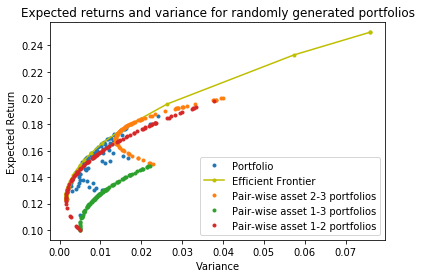

In [102]:
# create portfolios with asset 3 allocated 0
rand_matrix3 = np.copy(rand_matrix)
rand_matrix3[:, 2] = 0
# print rand_matrix2

portfolio3 = np.zeros((n_portfolio, n_asset))
i = 0
for row in rand_matrix3: # each portfolio sum up to 1
    row_sum = np.sum(row)
    j = 0
    for col in row:
        portfolio3[i][j] = col/row_sum
        j += 1
    i += 1
# print portfolio2
E3 = np.dot(portfolio3, assets)

variance3 = np.zeros((n_portfolio, 1))
i = 0
for row in portfolio3:
    variance3[i] = np.dot(np.dot(row, C), row.T)
    i += 1

ax.plot(variance3, E3, 'o', markersize=3, label="Pair-wise asset 1-2 portfolios")
ax.legend()
# ax.legend_.remove()
fig